In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cross_validation
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

C:\Users\kyle\Anaconda2\envs\MLND\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
boston = pd.read_csv("boston.csv")

In [3]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Separate the features and the targets

In [4]:
X = boston.loc[:, 'zn':'medv']
y = boston.loc[:, 'crim']

Inital test just using linear regression

In [36]:
linear = LinearRegression()
n = len(X)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
score = -1*cross_validation.cross_val_score(linear, X, y,
                                            cv=kf_10, scoring='mean_squared_error').mean()
print("Linear Regression score = " + str(score) )

Linear Regression score = 43.5300839883


Create an array of alpha values to find the general range of best alphas to use for narrower searches using Lasso and Ridge regression.

In [7]:
alphas_first = 10**np.linspace(10,-2,100)*0.5

## Ridge

Due to a relative small sample size, k fold validation is used for the best test error estimation. Simply spliting into one test and validation set could be too biased and using LOOCV could be have too much variance for the estimation so K-fold = 10 is choosen for the best bias variance tradeoff for the size of this dataset.

In [8]:
ridgecv = RidgeCV(alphas=alphas_first, cv=10, scoring='mean_squared_error')
ridgecv.fit(X, y)

RidgeCV(alphas=array([  5.00000e+09,   3.78232e+09, ...,   6.60971e-03,   5.00000e-03]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='mean_squared_error', store_cv_values=False)

In [9]:
ridgecv.alpha_

352.74011553593226

Using this alpha value, we'll create another array of alphas to search through so as to get an even better parameter.

In [10]:
alphas_ridge = np.linspace(300,400,500)

In [12]:
ridgecv2 = RidgeCV(alphas=alphas_ridge, cv=10, scoring='mean_squared_error')
ridgecv2.fit(X, y)

RidgeCV(alphas=array([ 300.    ,  300.2004, ...,  399.7996,  400.    ]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='mean_squared_error', store_cv_values=False)

In [15]:
print("Best found Ridge alpha value with all features = " + str(ridgecv2.alpha_))

Best found Ridge alpha value with all features = 314.629258517


In [19]:
ridge = Ridge(alpha=ridgecv2.alpha_)
n = len(X)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
score = -1*cross_validation.cross_val_score(ridge, X, y,
                                            cv=kf_10, scoring='mean_squared_error').mean()

In [21]:
print("Best estimated Ridge score = " + str(score))

Best estimated Ridge score = 43.533076537


## Lasso

In [24]:
lassocv = LassoCV(alphas=alphas_first, cv=10, max_iter=10000)
lassocv.fit(X, y)

LassoCV(alphas=array([  5.00000e+09,   3.78232e+09, ...,   6.60971e-03,   5.00000e-03]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [25]:
lassocv.alpha_

0.3289666123287841

In [27]:
alphas_lasso = np.linspace(0.01,0.5,500)

In [30]:
lassocv2 = LassoCV(alphas=alphas_lasso, cv=10, max_iter=10000)
lassocv2.fit(X, y)

LassoCV(alphas=array([ 0.01   ,  0.01098, ...,  0.49902,  0.5    ]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [31]:
lassocv2.alpha_

0.28396793587174352

In [41]:
lasso = Lasso(alpha=lassocv2.alpha_)
n = len(X)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
score = -1*cross_validation.cross_val_score(lasso, X, y,
                                            cv=kf_10, scoring='mean_squared_error').mean()

In [42]:
print("Best estimated Lasso score = " + str(score))

Best estimated Lasso score = 43.4789989619


In [131]:
lassocv2.coef_

array([  4.05582573e-02,  -8.23391831e-02,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   6.97228743e-05,
        -5.61511132e-01,   5.32958006e-01,  -2.88581851e-03,
        -3.70332845e-02,  -8.47067369e-03,   1.19421699e-01,
        -1.34574212e-01])

In [139]:
X.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## PCR

In [46]:
pca = PCA()
X_reduced = pca.fit_transform(X)

In [47]:
print(X_reduced.shape)

(506L, 13L)


In [48]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 80.54,  96.84,  98.98,  99.68,  99.87,  99.92,  99.96,  99.98,
        99.99,  99.99,  99.99,  99.99,  99.99])

In [49]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 13 principle components, adding one component at the time.
for i in np.arange(1, 14):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1);

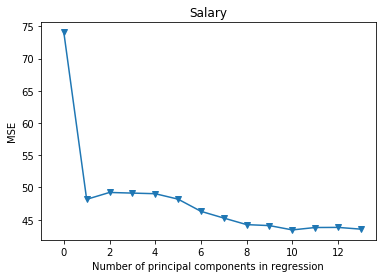

In [50]:
plt.show()

In [147]:
mse

[74.081230151604061,
 48.156469949502856,
 49.224003793232797,
 49.124093664116842,
 49.028962538057364,
 48.183027825317751,
 46.294833076756554,
 45.250144196740088,
 44.231543493170328,
 44.079070996356606]

## Removing features

Feature removal based off F-score

In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
k_class = SelectKBest(f_regression, k=10)
transformed = k_class.fit_transform(X, y)
mask = k_class.get_support() #list of booleans
new_features = [] # The list of your K best features
feature_names = X.columns
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

X_new = pd.DataFrame(transformed, columns=new_features)
X_new.head()

,indus,nox,age,dis,rad,tax,ptratio,black,lstat,medv
0,2.31,0.538,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,7.07,0.469,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,7.07,0.469,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,2.18,0.458,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,2.18,0.458,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [137]:
X.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [96]:
ridgecv_new = RidgeCV(alphas=alphas_first, cv=10, scoring='mean_squared_error')
ridgecv_new.fit(X_new, y)
print(ridgecv_new.alpha_)

352.740115536


In [97]:
ridge = Ridge(alpha=ridgecv_new.alpha_)
n = len(X_new)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
score = -1*cross_validation.cross_val_score(ridge, X_new, y,
                                            cv=kf_10, scoring='mean_squared_error').mean()
print(score)

43.9510130547


In [98]:
line = LinearRegression()
n = len(X_new)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
score = -1*cross_validation.cross_val_score(line, X_new, y,
                                            cv=kf_10, scoring='mean_squared_error').mean()
print(score)

43.9557606665


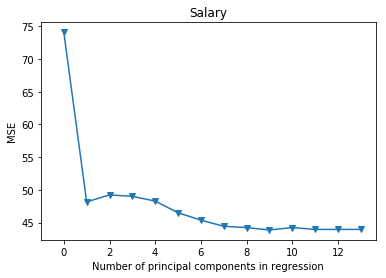

In [99]:
pca = PCA()
X_reduced = pca.fit_transform(X_new)
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 13 principle components, adding one component at the time.
for i in np.arange(1, 14):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1);
plt.show()

In [100]:
mse

[74.081230151604061,
 48.160180631873608,
 49.227564515203994,
 49.00778128317129,
 48.28621734251572,
 46.501351652130545,
 45.374683107025461,
 44.435075745749039,
 44.2293217795755,
 43.879811109218373,
 44.240279500837147,
 43.955760666497,
 43.955760666497,
 43.955760666497]

In [128]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, 10, step=1) 
transformed = selector.fit_transform(X, y)
mask = selector.support_ #list of booleans
new_features = [] # The list of your K best features
feature_names = X.columns
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

X_new = pd.DataFrame(transformed, columns=new_features)

,zn,indus,chas,nox,rm,dis,rad,ptratio,lstat,medv
0,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,15.3,4.98,24.0
1,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,17.8,9.14,21.6
2,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,17.8,4.03,34.7
3,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,18.7,2.94,33.4
4,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,18.7,5.33,36.2


In [129]:
line = LinearRegression()
n = len(X_new)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
score = -1*cross_validation.cross_val_score(line, X_new, y,
                                            cv=kf_10, scoring='mean_squared_error').mean()
print(score)

42.3380678081


In [130]:
ridgecv_new = RidgeCV(alphas=alphas_first, cv=10, scoring='mean_squared_error')
ridgecv_new.fit(X_new, y)
ridge = Ridge(alpha=ridgecv_new.alpha_)
n = len(X_new)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
score = -1*cross_validation.cross_val_score(ridge, X_new, y,
                                            cv=kf_10, scoring='mean_squared_error').mean()
print(score)

42.3794993999


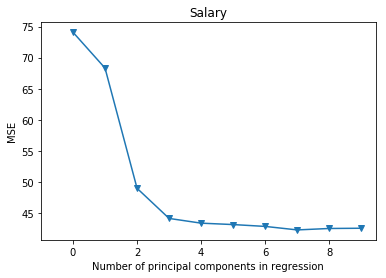

In [134]:
pca = PCA()
X_reduced = pca.fit_transform(X_new)
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 13 principle components, adding one component at the time.
for i in np.arange(1, 10):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1);
plt.show()

In [135]:
mse

[74.081230151604061,
 68.323589625836831,
 49.014965599707459,
 44.17650372369274,
 43.416752254444489,
 43.19174914968724,
 42.894548790921348,
 42.332570548452814,
 42.563463462296376,
 42.601806187393215]

Feature removal based off lasso coefficients

In [142]:
lasso_zeros = ['chas','nox','rm']
X_new = X.drop(lasso_zeros, axis=1)
X_new.head()

,zn,indus,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,2.31,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [143]:
line = LinearRegression()
n = len(X_new)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
score = -1*cross_validation.cross_val_score(line, X_new, y,
                                            cv=kf_10, scoring='mean_squared_error').mean()
print(score)

43.4089310664


## Discussion of Attempts

After performing many models, some with all features and some with less, the best model we got was made by using recursive feature elimination based on linear regression coefficient values to get 10 features and then using PCR with the first 7 principle components. This got a MSE score 42.332 which was calculated using k-fold cross validation with k=10. The features removed in this case were 'tax', 'age' and 'black'. These features were removed because their coefficients contributed the least to the prediction.<br>

Other models are shown above. They include PCR, Ridge, and Lasso regression over all features. These models all got a MSE score of around 43.5. Another method included select k best which was based on f-score. The features removed in this case were 'zn', 'chas', 'rm'. This performed worse than using all the features. Finally 3 features were removed ('chas', 'nox', 'rm') based on the Lasso coefficients and normal linear regression was run on them. This also performed worse than the RFE PCR model.
